<a href="https://colab.research.google.com/github/ravi-gopalan/predicting_pneumonia/blob/master/chest_xray_predictions_cnn_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!find -type d -name capstone -exec rm -rf {} \;

find: ‘./capstone’: No such file or directory


In [0]:
cd /content

/content


In [0]:
!ls -la

total 28
drwxr-xr-x 1 root root 4096 May 25 06:54 .
drwxr-xr-x 1 root root 4096 May 25 06:48 ..
drwxr-xr-x 2 root root 4096 May 25 06:50 capstone
drwxr-xr-x 6 root root 4096 May 25 06:59 chest_xray
drwxr-xr-x 1 root root 4096 May 23 16:08 .config
drwxr-xr-x 2 root root 4096 May 25 06:51 .kaggle
drwxr-xr-x 1 root root 4096 May 22 16:22 sample_data


In [0]:
!cp -v /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

'/content/.kaggle/kaggle.json' -> '/root/.kaggle/kaggle.json'


Create 2 folders within the /content folder '.kaggle' and 'capstone'

In [0]:
!cd /content
!mkdir .kaggle
!mkdir capstone
!ls -la

total 24
drwxr-xr-x 1 root root 4096 May 25 06:50 .
drwxr-xr-x 1 root root 4096 May 25 06:48 ..
drwxr-xr-x 2 root root 4096 May 25 06:50 capstone
drwxr-xr-x 1 root root 4096 May 23 16:08 .config
drwxr-xr-x 2 root root 4096 May 25 06:50 .kaggle
drwxr-xr-x 1 root root 4096 May 22 16:22 sample_data


Create the kaggle.json file using the API token. This will help download the data directly from Kaggle dataset

In [0]:
import json
token = {"username":"ravijee","key":"e4042f800aaee606f244555554f6fd8e"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
cd /root

/root


Create a .kaggle folder within the root directory and copy the contents of the kaggle.json.
Change the permissions of the file

In [0]:

!mkdir .kaggle
    
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

Download Data from Kaggle website through API. Data gets downloaded as chest-xray-pneumonia.zip

---
Unzip the file. This then creates a folder called chest_xray.zip  

---

Unzip the chest_xray.zip file, which then creates a directory called chest_xray and subdirectories containing train, val and test subdirectories as well as a __MACOSX folder

---

Remove the __MACOSX folder


In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content
!unzip /content/chest-xray-pneumonia.zip
!cd /content

!unzip /content/chest_xray.zip
!ls -la

 99% 1.14G/1.15G [00:13<00:00, 96.0MB/s]
100% 1.15G/1.15G [00:13<00:00, 92.0MB/s]
Archive:  /content/chest-xray-pneumonia.zip
  inflating: chest_xray.zip          
Archive:  /content/chest_xray.zip
   creating: chest_xray/
  inflating: chest_xray/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/chest_xray/
  inflating: __MACOSX/chest_xray/._.DS_Store  
   creating: chest_xray/test/
  inflating: chest_xray/test/.DS_Store  
   creating: __MACOSX/chest_xray/test/
  inflating: __MACOSX/chest_xray/test/._.DS_Store  
   creating: chest_xray/test/PNEUMONIA/
  inflating: chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
   creating: __MACOSX/chest_xray/test/PNEUMONIA/
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg  
  inflating: __MAC

In [0]:
!rm /content/chest-xray-pneumonia.zip
!rm /content/chest_xray.zip
!cd /content/chest_xray
!rm -r __MACOSX

Pre-processing

---

The data file has multiple directories anf files names '.DS_Store'.
Remove all files and directories named '.DS_Store' as they will cause issues in our processing

In [0]:
!cd /content/chest_xray
!find -type d -name .DS_Store -exec ls -a {} \;
!find -type d -name .DS_Store -exec rm -rf {} \;
!find -name .DS_Store -exec rm -rf {} \;

!cd /content/chest_xray
!find -type d -name .DS_Store -exec ls -a {} \;
!find -name .DS_Store -exec ls -a {} \;


In [0]:
import os
os.chdir('/content/chest_xray')
!ls -la

total 24
drwxr-xr-x 6 root root 4096 May 25 06:59 .
drwxr-xr-x 1 root root 4096 May 25 06:54 ..
drwxr-xr-x 2 root root 4096 May 25 07:14 saved_models
drwxr-xr-x 4 root root 4096 May 25 06:54 test
drwxr-xr-x 4 root root 4096 May 25 06:54 train
drwxr-xr-x 4 root root 4096 May 25 06:54 val


In [0]:


!ls -la
!mkdir saved_models
!ls -la




total 24
drwxr-xr-x 6 root root 4096 May 25 06:59 .
drwxr-xr-x 1 root root 4096 May 25 06:54 ..
drwxr-xr-x 2 root root 4096 May 25 07:14 saved_models
drwxr-xr-x 4 root root 4096 May 25 06:54 test
drwxr-xr-x 4 root root 4096 May 25 06:54 train
drwxr-xr-x 4 root root 4096 May 25 06:54 val
mkdir: cannot create directory ‘saved_models’: File exists
total 24
drwxr-xr-x 6 root root 4096 May 25 06:59 .
drwxr-xr-x 1 root root 4096 May 25 06:54 ..
drwxr-xr-x 2 root root 4096 May 25 07:14 saved_models
drwxr-xr-x 4 root root 4096 May 25 06:54 test
drwxr-xr-x 4 root root 4096 May 25 06:54 train
drwxr-xr-x 4 root root 4096 May 25 06:54 val


In [0]:
!ls -la

total 28
drwxr-xr-x 1 root root 4096 May 25 06:54 .
drwxr-xr-x 1 root root 4096 May 25 06:48 ..
drwxr-xr-x 2 root root 4096 May 25 06:50 capstone
drwxr-xr-x 6 root root 4096 May 25 06:59 chest_xray
drwxr-xr-x 1 root root 4096 May 23 16:08 .config
drwxr-xr-x 2 root root 4096 May 25 06:51 .kaggle
drwxr-xr-x 1 root root 4096 May 22 16:22 sample_data


Import the libraries that will be required
os, pathlib for file operations
glob to get the image files
PIL for image manipulations
numpy, pandas for array operations
matplotlib, seaborn for graphical visualizations

In [0]:
import os
from pathlib import Path
import glob
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.datasets import load_files
from keras.utils import np_utils

from keras.preprocessing import image
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


from tqdm import tqdm

from PIL import ImageFile

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential, Model
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, History, CSVLogger
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, fbeta_score, roc_curve, cohen_kappa_score
from sklearn.metrics import auc, roc_auc_score, precision_recall_curve 

from keras.applications import vgg16, inception_v3, resnet50, mobilenet, xception

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
# Ensure results are reproducible
# Set the seed for hash based operations in python
os.environ['PYTHONHASHSEED'] = '0'

seed=42

# Set the numpy seed
np.random.seed(seed)

Create variables to get the image files from the path 

In [0]:
# data path
data_dir = Path('/content/chest_xray')

# path to directory containing train set
train_dir = data_dir / 'train'

# path to directory containing validation set
val_dir = data_dir / 'val'

# path to the directory containing test set
test_dir = data_dir / 'test'

type(data_dir)

pathlib.PosixPath

Create a helper function 'load_dataset(path)' that takes in a path argument,loads the files and creates a tuple of the filenames showing the filenames and the target( 1 for Normal and 0 for Pneumonia)

In [0]:

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    xray_files = np.array(data['filenames'])
    xray_targets = np_utils.to_categorical(np.array(data['target']), 2)
    return xray_files, xray_targets

  
  
# load train, test, and validation datasets
train_files, train_targets = load_dataset(train_dir)
valid_files, valid_targets = load_dataset(val_dir)
test_files, test_targets = load_dataset(test_dir)


In [0]:
print('There are %s total x_ray images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training x_ray images.' % len(train_files))
print('There are %d validation x_ray images.' % len(valid_files))
print('There are %d test x_ray images.'% len(test_files))

print('Total cases in the train set: {}'.format(train_targets.shape[0]))
print('Normal cases in the train set: {}'.format(np.count_nonzero(train_targets,axis=0)[0]))
print('% of Normal cases in the train set: {:.1%}'.format(np.count_nonzero(train_targets,axis=0)[0]/train_targets.shape[0]))

print('Total cases in the validation set: {}'.format(valid_targets.shape[0]))
print('Normal cases in the validation set: {}'.format(np.count_nonzero(valid_targets,axis=0)[0]))
print('% of Normal cases in the validation set: {:.1%}'.format(np.count_nonzero(valid_targets,axis=0)[0]/valid_targets.shape[0]))

print('Total cases in the test set: {}'.format(test_targets.shape[0]))
print('Normal cases in the test set: {}'.format(np.count_nonzero(test_targets,axis=0)[0]))
print('% of Normal cases in the test set: {:.1%}'.format(np.count_nonzero(test_targets,axis=0)[0]/test_targets.shape[0]))

There are 5856 total x_ray images.

There are 5216 training x_ray images.
There are 16 validation x_ray images.
There are 624 test x_ray images.
Total cases in the train set: 5216
Normal cases in the train set: 1341
% of Normal cases in the train set: 25.7%
Total cases in the validation set: 16
Normal cases in the validation set: 8
% of Normal cases in the validation set: 50.0%
Total cases in the test set: 624
Normal cases in the test set: 234
% of Normal cases in the test set: 37.5%


In [0]:
os.chdir('/content/chest_xray')

Insert a graphic representation of the distribution of the input data

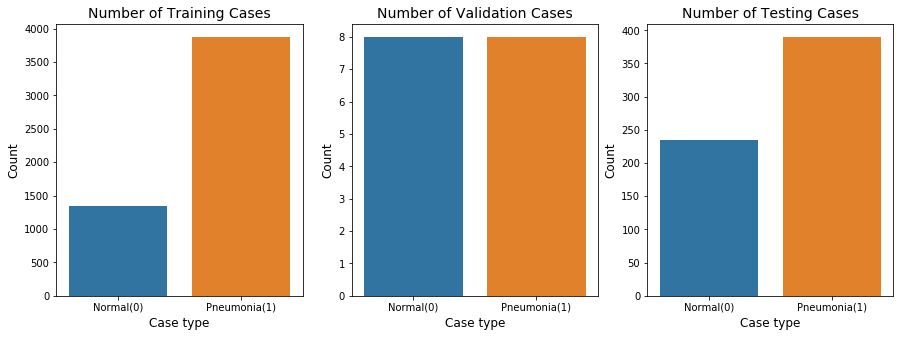

In [0]:

# Get the counts for each class
df_train = pd.DataFrame({'Pneumonia':train_targets[:,1]})
training_count = df_train['Pneumonia'].value_counts()

df_valid = pd.DataFrame({'Pneumonia':valid_targets[:,1]})
validation_count = df_valid['Pneumonia'].value_counts()

df_test = pd.DataFrame({'Pneumonia':test_targets[:,1]})
testing_count = df_test['Pneumonia'].value_counts()

# Plot the results 

plt.show()


%matplotlib inline

fig_x = plt.figure(figsize=(15,5))
gs_x = gridspec.GridSpec(1, 3)


ax1 = plt.subplot(gs_x[0, 0])
ax1 = sns.barplot(x=training_count.index, y= training_count.values)
ax1 = plt.title('Number of Training Cases', fontsize=14)
ax1 = plt.xlabel('Case type', fontsize=12)
ax1 = plt.ylabel('Count', fontsize=12)
ax1 = plt.xticks(range(len(training_count.index)), ['Normal(0)', 'Pneumonia(1)'])




ax2 = plt.subplot(gs_x[0, 1])
ax2 = sns.barplot(x=validation_count.index, y= validation_count.values)
ax2 = plt.title('Number of Validation Cases', fontsize=14)
ax2 = plt.xlabel('Case type', fontsize=12)
ax2 = plt.ylabel('Count', fontsize=12)
ax2 = plt.xticks(range(len(validation_count.index)), ['Normal(0)', 'Pneumonia(1)'])





ax3 = plt.subplot(gs_x[0, 2])
ax3 = sns.barplot(x=testing_count.index, y= testing_count.values)
ax3 = plt.title('Number of Testing Cases', fontsize=14)
ax3 = plt.xlabel('Case type', fontsize=12)
ax3 = plt.ylabel('Count', fontsize=12)
ax3 = plt.xticks(range(len(testing_count.index)), ['Normal(0)', 'Pneumonia(1)'])

# show the plot


plt.savefig('saved_models/raw_data_distribution.png')
plt.show()

The training data set is unbalanced with normal cases at ~25% and ~75% of pneumonia cases that may bias our learning algorithm and hence will need to be balanced

In [0]:
rus = RandomUnderSampler(ratio='majority',random_state=42)
train_files_rebalanced, train_targets_rebalanced = rus.fit_sample(train_files.reshape(-1,1), train_targets)

In [0]:
ros = RandomOverSampler(random_state=42)
train_files_oversampled, train_targets_oversampled = ros.fit_resample(train_files.reshape(-1,1), train_targets)

In [0]:
print('Total cases in the undersampled train set: {}'.format(train_targets_rebalanced.shape[0]))
print('Normal cases in the undersampled train set: {}'.format(np.count_nonzero(train_targets_rebalanced,axis=0)[0]))
print('% of Normal cases in the undersampled train set: {:.1%}'.format(np.count_nonzero(train_targets_rebalanced,axis=0)[0]/train_targets_rebalanced.shape[0]))

print('Total cases in the oversampled train set: {}'.format(train_targets_oversampled.shape[0]))
print('Normal cases in the oversampled train set: {}'.format(np.count_nonzero(train_targets_oversampled,axis=0)[0]))
print('% of Normal cases in the oversampled train set: {:.1%}'.format(np.count_nonzero(train_targets_oversampled,axis=0)[0]/train_targets_oversampled.shape[0]))

Total cases in the undersampled train set: 2682
Normal cases in the undersampled train set: 1341
% of Normal cases in the undersampled train set: 50.0%
Total cases in the oversampled train set: 7750
Normal cases in the oversampled train set: 3875
% of Normal cases in the oversampled train set: 50.0%


In [0]:
# create a function to determine the label of the case from the name of the image
def normal_or_pneumonia(name):
  if name.__contains__('NORMAL'):
    case = 'Normal'
  else:
    case = 'Pneumonia'
  return case
    



Find the number of different sizes of images. There are 4366 different image sizes in the training set comprising 5216 images. This will need to be resized to a standard size to ensure the algorithm learns

In [0]:
image_sizes = []
for pic in range(len(train_files)):
  image_sizes.append(image.load_img(np.squeeze(train_files,axis=None)[pic]).size)  
df_image_sizes = pd.DataFrame(image_sizes, columns=['first','second'])
df_image_sizes['size'] = '('+df_image_sizes['first'].map(str)+','+df_image_sizes['second'].map(str)+')'
df_image_sizes['size'].nunique()

4366

Create a visual representation of some random x-rays showing normal and pneumonia afflicted lungs to see how they are different

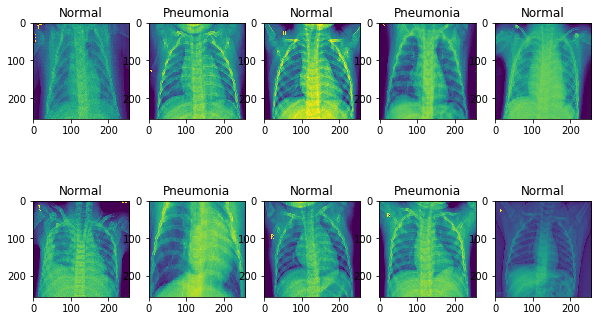

<Figure size 432x288 with 0 Axes>

In [0]:
%matplotlib inline

grid_height = 2
grid_width = 5

fig_b = plt.figure(figsize=(10,6))
gs_b = gridspec.GridSpec(grid_height, grid_width)

np.random.randint(0,2682)
[image.load_img(np.squeeze(train_files_rebalanced,axis=None)[np.random.randint(0,2682)], target_size=(256, 256)),\
                         normal_or_pneumonia(np.squeeze(train_files_rebalanced,axis=None)[np.random.randint(0,2682)])]

for row in range(grid_height):
  for col in range(grid_width):
    plt.subplot(gs_b[row, col])
    plt.title(normal_or_pneumonia(np.squeeze(train_files_rebalanced,axis=None)[np.random.randint(0,2682)]))
    plt.imshow(image.load_img(np.squeeze(train_files_rebalanced,axis=None)[np.random.randint(0,2682)], target_size=(256, 256)).convert('L'))

plt.show()
plt.savefig('saved_models/sample_images.png')

Tensor for the CNN

In [0]:


def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(256, 256))
    # convert PIL.Image.Image type to 3D tensor with shape (256, 256, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 256, 256, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)
  
  


Load all the images and create the tensor for processing

In [0]:
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255
train_tensors_rebalanced = paths_to_tensor(np.squeeze(train_files_rebalanced)).astype('float32')/255
#train_tensors_oversampled = paths_to_tensor(np.squeeze(train_files_oversampled)).astype('float32')/255


100%|██████████| 624/624 [00:05<00:00, 114.69it/s]


In [0]:
print(train_tensors_rebalanced.shape)

NameError: ignored

Benchmark Model - 1 layer CNN

In [0]:
benchmark_model = Sequential()

benchmark_model.add(Conv2D(filters=8, kernel_size=2, padding='valid', activation='relu',input_shape=(256,256,3)))
benchmark_model.add(GlobalAveragePooling2D())
benchmark_model.add(Dense(2, activation='softmax'))
benchmark_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
  
benchmark_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 255, 255, 8)       104       
_________________________________________________________________
global_average_pooling2d_1 ( (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,vertical_flip = True)

In [0]:
def report_metrics(model, t_tensors, t_targets):
  # get the predictions for the test set
  predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in t_tensors]
  pred_categorical = np_utils.to_categorical(predictions,2)
  # calculate metrics
  report_accuracy = 100*np.sum(np.array(predictions)==np.argmax(t_targets, axis=1))/len(predictions)
  report_conf_matrix = confusion_matrix(t_targets.argmax(axis=1),pred_categorical.argmax(axis=1))
  report_cohens_kappa = cohen_kappa_score(t_targets.argmax(axis=1),pred_categorical.argmax(axis=1))
  report_precision_rate = precision_score(t_targets.argmax(axis=1),pred_categorical.argmax(axis=1))
  report_recall_rate = recall_score(t_targets.argmax(axis=1),pred_categorical.argmax(axis=1))
  
  report_f1 = f1_score(t_targets.argmax(axis=1),pred_categorical.argmax(axis=1))
  report_fbeta_2 = fbeta_score(t_targets.argmax(axis=1),pred_categorical.argmax(axis=1),beta=2)
  # calculate precision-recall curve
  report_precision, report_recall, report_PRC_thresholds = precision_recall_curve(t_targets.argmax(axis=1), pred_categorical.argmax(axis=1))
  report_AUC = auc(report_recall, report_precision)
  # calculate roc curve
  report_fpr, report_tpr, report_ROC_thresholds = roc_curve(t_targets.argmax(axis=1), pred_categorical.argmax(axis=1), pos_label=1)
  report_ROC_AUC = roc_auc_score(t_targets.argmax(axis=1), pred_categorical.argmax(axis=1))
  report_output = {'accuracy':report_accuracy,\
            'confusion_matrix': report_conf_matrix,\
            'kappa_score': report_cohens_kappa,\
            'precision': report_precision_rate,\
            'recall': report_recall_rate,\
            'f1': report_f1,\
            'fbeta_2': report_fbeta_2,\
            'PRC_precision': report_precision,\
            'PRC_recall': report_recall,\
            'PRC_thresholds': report_PRC_thresholds,\
            'AUC': report_AUC,\
            'fpr': report_fpr,\
            'tpr': report_tpr,\
            'ROC_thresholds': report_ROC_thresholds,\
            'ROC_AUC': report_ROC_AUC}
  return report_output

In [0]:
### Do NOT modify the code below this line.

benchmark_checkpointer = ModelCheckpoint(filepath='saved_models/benchmark.hdf5', 
                               verbose=1, save_best_only=True)


benchmark_model.fit_generator(datagen.flow(train_tensors, train_targets,batch_size=32),steps_per_epoch=len(train_tensors)/32, epochs=1,\
                              validation_data=(valid_tensors, valid_targets), verbose=1, \
                              callbacks=[benchmark_checkpointer])

benchmark_model.load_weights('saved_models/benchmark.hdf5')
report_benchmark = report_metrics(benchmark_model,test_tensors,test_targets)

print('Benchmark Model: \n {}'.format(report_benchmark))  

Epoch 1/1
163/163 [==============================] - 65s 399ms/step - loss: 0.5684 - acc: 0.7429 - val_loss: 0.8268 - val_acc: 0.5000

Epoch 00001: val_loss improved from inf to 0.82676, saving model to saved_models/benchmark.hdf5
Benchmark Model: 
 {'accuracy': 62.5, 'confusion_matrix': array([[  0, 234],
       [  0, 390]]), 'kappa_score': 0.0, 'precision': 0.625, 'recall': 1.0, 'f1': 0.7692307692307693, 'fbeta_2': 0.8928571428571429, 'PRC_precision': array([0.625, 1.   ]), 'PRC_recall': array([1., 0.]), 'PRC_thresholds': array([1]), 'AUC': 0.8125, 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'ROC_thresholds': array([2, 1]), 'ROC_AUC': 0.5}


Create the Keras CNN model with 6 convolutional layers (each with relu activation, followed by max pooling, dropout and Batch Normalization) and finally a Global Average Pooling followed by a Dense layer

In [0]:
def create_CNN_model(filters = [8, 16, 32, 64, 128, 256], kernel_size = 2, padding = 'valid', \
                     activation = 'relu', input_shape = (256, 256, 3), dropout_rate = 0.2, \
                     pool_size=2, final_activation = 'softmax'):
  model = Sequential()

  model.add(Conv2D(filters=filters[0], kernel_size=kernel_size, padding=padding, activation=activation,input_shape=input_shape))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
            
  model.add(Conv2D(filters=filters[1], kernel_size=kernel_size, padding=padding, activation=activation))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
            
  model.add(Conv2D(filters=filters[2], kernel_size=kernel_size, padding=padding, activation=activation))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())

  model.add(Conv2D(filters=filters[3], kernel_size=kernel_size, padding=padding, activation=activation))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
            
  model.add(Conv2D(filters=filters[4], kernel_size=kernel_size, padding=padding, activation=activation))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
             
  model.add(Conv2D(filters=filters[5], kernel_size=kernel_size, padding=padding, activation=activation))
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
             
  model.add(GlobalAveragePooling2D())


  model.add(Dense(2, activation=final_activation))
            
  return model

In [0]:
cnn_model1 = create_CNN_model(filters = [16, 32, 64, 128, 128, 256], kernel_size = 2, padding = 'valid', \
                     activation = 'relu', input_shape = (256, 256, 3), dropout_rate = 0.1, \
                     pool_size=2, final_activation = 'softmax')

cnn_model1.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 255, 255, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 127, 127, 16)      64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 126, 126, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
___________________________

In [0]:
cnn_model2 = create_CNN_model(filters = [16, 32, 64, 128, 128, 256], kernel_size = 2, padding = 'valid', \
                     activation = 'relu', input_shape = (256, 256, 3), dropout_rate = 0.2, \
                     pool_size=2, final_activation = 'softmax')

cnn_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 255, 255, 16)      208       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 127, 127, 16)      0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 127, 127, 16)      64        
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 126, 126, 32)      2080      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 63, 63, 32)        0         
__________

In [0]:
cnn_model3 = create_CNN_model(filters = [16, 32, 64, 128, 128, 256], kernel_size = 2, padding = 'valid', \
                     activation = 'relu', input_shape = (256, 256, 3), dropout_rate = 0.25, \
                     pool_size=2, final_activation = 'softmax')

cnn_model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 255, 255, 16)      208       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 127, 127, 16)      0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 127, 127, 16)      64        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 126, 126, 32)      2080      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 63, 63, 32)        0         
__________

In [0]:
cnn_model4 = create_CNN_model(filters = [16, 32, 64, 128, 128, 256], kernel_size = 2, padding = 'valid', \
                     activation = 'relu', input_shape = (256, 256, 3), dropout_rate = 0.5, \
                     pool_size=2, final_activation = 'softmax')

cnn_model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 255, 255, 16)      208       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 127, 127, 16)      0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 127, 127, 16)      64        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 126, 126, 32)      2080      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 63, 63, 32)        0         
__________

Compile the model and then run

In [0]:
!cd /content/chest_xray
!mkdir saved_models
!ls -la

total 24
drwxr-xr-x 6 root root 4096 May 23 22:55 .
drwxr-xr-x 1 root root 4096 May 23 22:45 ..
drwxr-xr-x 2 root root 4096 May 23 22:55 saved_models
drwxr-xr-x 4 root root 4096 May 23 22:45 test
drwxr-xr-x 4 root root 4096 May 23 22:45 train
drwxr-xr-x 4 root root 4096 May 23 22:45 val


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd saved_models


/content/gdrive/My Drive/Colab_stuff/saved_models


In [0]:

!ls -la

total 15625
-rw------- 1 root root 1999688 May 22 17:20 best_cnn1_bal.hdf5
-rw------- 1 root root 1999688 May 22 17:20 best_cnn1_unbal.hdf5
-rw------- 1 root root 2000056 May 22 17:20 best_cnn2_bal.hdf5
-rw------- 1 root root 2000056 May 22 17:20 best_cnn2_unbal.hdf5
-rw------- 1 root root 1999696 May 22 17:20 best_cnn3_bal.hdf5
-rw------- 1 root root 1999696 May 22 17:20 best_cnn3_unbal.hdf5
-rw------- 1 root root 1999696 May 22 17:20 best_cnn4_bal.hdf5
-rw------- 1 root root 1999696 May 22 17:20 best_cnn4_unbal.hdf5


In [0]:
!cp -v *.hdf5 /content/chest_xray/saved_models
!ls -la /content/chest_xray/saved_models

'best_cnn1_bal.hdf5' -> '/content/chest_xray/saved_models/best_cnn1_bal.hdf5'
'best_cnn1_unbal.hdf5' -> '/content/chest_xray/saved_models/best_cnn1_unbal.hdf5'
'best_cnn2_bal.hdf5' -> '/content/chest_xray/saved_models/best_cnn2_bal.hdf5'
'best_cnn2_unbal.hdf5' -> '/content/chest_xray/saved_models/best_cnn2_unbal.hdf5'
'best_cnn3_bal.hdf5' -> '/content/chest_xray/saved_models/best_cnn3_bal.hdf5'
'best_cnn3_unbal.hdf5' -> '/content/chest_xray/saved_models/best_cnn3_unbal.hdf5'
'best_cnn4_bal.hdf5' -> '/content/chest_xray/saved_models/best_cnn4_bal.hdf5'
'best_cnn4_unbal.hdf5' -> '/content/chest_xray/saved_models/best_cnn4_unbal.hdf5'
total 15656
drwxr-xr-x 2 root root    4096 May 22 23:13 .
drwxr-xr-x 6 root root    4096 May 22 23:02 ..
-rw------- 1 root root 1999688 May 22 23:13 best_cnn1_bal.hdf5
-rw------- 1 root root 1999688 May 22 23:13 best_cnn1_unbal.hdf5
-rw------- 1 root root 2000056 May 22 23:13 best_cnn2_bal.hdf5
-rw------- 1 root root 2000056 May 22 23:13 best_cnn2_unbal.hdf5

In [0]:
!cd /content/chest_xray/saved_models

In [0]:
cnn_model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Augment images by including some random rotations, shifts etc so that the model can learn better

In [0]:
def one_hot(a, num_classes):
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

train_targets_rebalanced_OHE = one_hot(train_targets_rebalanced,2)

In [0]:
batch_size = 64
epochs = 50

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=15, mode='min')


checkpoint_unbal_cnn1 = ModelCheckpoint(filepath='saved_models/best_cnn1_unbal.hdf5', \
                                              monitor='val_loss', mode='min', verbose=1, save_best_only=True)

csv_logger_checkpoint_unbal_cnn1 = CSVLogger('saved_models/training_unbalanced_1.log', separator=',', append=False)

checkpoint_unbal_cnn2 = ModelCheckpoint(filepath='saved_models/best_cnn2_unbal.hdf5', \
                                              monitor='val_loss', mode='min', verbose=1, save_best_only=True)

csv_logger_checkpoint_unbal_cnn2 = CSVLogger('saved_models/training_unbalanced_2.log', separator=',', append=False)

checkpoint_unbal_cnn3 = ModelCheckpoint(filepath='saved_models/best_cnn3_unbal.hdf5', \
                                              monitor='val_loss', mode='min', verbose=1, save_best_only=True)

csv_logger_checkpoint_unbal_cnn3 = CSVLogger('saved_models/training_unbalanced_3.log', separator=',', append=False)


checkpoint_unbal_cnn4 = ModelCheckpoint(filepath='saved_models/best_cnn4_unbal.hdf5', \
                                              monitor='val_loss', mode='min', verbose=1, save_best_only=True)

csv_logger_checkpoint_unbal_cnn4 = CSVLogger('saved_models/training_unbalanced_4.log', separator=',', append=False)


train_unbal_cnn1 = cnn_model1.fit_generator(datagen.flow(train_tensors, train_targets,batch_size=batch_size),\
                               steps_per_epoch=len(train_tensors)/batch_size, epochs=epochs,\
                               validation_data=(valid_tensors, valid_targets), verbose=1, \
                               callbacks=[early_stopping_monitor, checkpoint_unbal_cnn1, csv_logger_checkpoint_unbal_cnn1])

train_unbal_cnn2 = cnn_model2.fit_generator(datagen.flow(train_tensors, train_targets,batch_size=batch_size),\
                               steps_per_epoch=len(train_tensors)/batch_size, epochs=epochs,\
                               validation_data=(valid_tensors, valid_targets), verbose=1, \
                               callbacks=[early_stopping_monitor, checkpoint_unbal_cnn2, csv_logger_checkpoint_unbal_cnn2])

train_unbal_cnn3 = cnn_model3.fit_generator(datagen.flow(train_tensors, train_targets,batch_size=batch_size),\
                               steps_per_epoch=len(train_tensors)/batch_size, epochs=epochs,\
                               validation_data=(valid_tensors, valid_targets), verbose=1, \
                               callbacks=[early_stopping_monitor, checkpoint_unbal_cnn3, csv_logger_checkpoint_unbal_cnn3])

train_unbal_cnn4 = cnn_model4.fit_generator(datagen.flow(train_tensors, train_targets,batch_size=batch_size),\
                               steps_per_epoch=len(train_tensors)/batch_size, epochs=epochs,\
                               validation_data=(valid_tensors, valid_targets), verbose=1, \
                               callbacks=[early_stopping_monitor, checkpoint_unbal_cnn4, csv_logger_checkpoint_unbal_cnn4])

train_targets_rebalanced_OHE = one_hot(train_targets_rebalanced,2)
checkpoint_bal_cnn1 = ModelCheckpoint(filepath='saved_models/best_cnn1_bal.hdf5', \
                                              monitor='val_loss', mode='min', verbose=1, save_best_only=True)

csv_logger_checkpoint_bal_cnn1 = CSVLogger('saved_models/training_balanced_1.log', separator=',', append=False)

checkpoint_bal_cnn2 = ModelCheckpoint(filepath='saved_models/best_cnn2_bal.hdf5', \
                                              monitor='val_loss', mode='min', verbose=1, save_best_only=True)

csv_logger_checkpoint_bal_cnn2 = CSVLogger('saved_models/training_balanced_2.log', separator=',', append=False)

checkpoint_bal_cnn3 = ModelCheckpoint(filepath='saved_models/best_cnn3_bal.hdf5', \
                                              monitor='val_loss', mode='min', verbose=1, save_best_only=True)

csv_logger_checkpoint_bal_cnn3 = CSVLogger('saved_models/training_balanced_3.log', separator=',', append=False)

checkpoint_bal_cnn4 = ModelCheckpoint(filepath='saved_models/best_cnn4_bal.hdf5', \
                                              monitor='val_loss', mode='min', verbose=1, save_best_only=True)

csv_logger_checkpoint_bal_cnn4 = CSVLogger('saved_models/training_balanced_4.log', separator=',', append=False)

train_bal_cnn1 = cnn_model1.fit_generator(datagen.flow(train_tensors_rebalanced, train_targets_rebalanced_OHE,batch_size=batch_size),\
                               steps_per_epoch=len(train_tensors_rebalanced)/batch_size, epochs=epochs,\
                               validation_data=(valid_tensors, valid_targets), verbose=1, \
                               callbacks=[early_stopping_monitor, checkpoint_bal_cnn1, csv_logger_checkpoint_bal_cnn1])

train_bal_cnn2 = cnn_model2.fit_generator(datagen.flow(train_tensors_rebalanced, train_targets_rebalanced_OHE,batch_size=batch_size),\
                               steps_per_epoch=len(train_tensors_rebalanced)/batch_size, epochs=epochs,\
                               validation_data=(valid_tensors, valid_targets), verbose=1, \
                               callbacks=[early_stopping_monitor, checkpoint_bal_cnn2, csv_logger_checkpoint_bal_cnn2])

train_bal_cnn3 = cnn_model3.fit_generator(datagen.flow(train_tensors_rebalanced, train_targets_rebalanced_OHE,batch_size=batch_size),\
                               steps_per_epoch=len(train_tensors_rebalanced)/batch_size, epochs=epochs,\
                               validation_data=(valid_tensors, valid_targets), verbose=1, \
                               callbacks=[early_stopping_monitor, checkpoint_bal_cnn3, csv_logger_checkpoint_bal_cnn3])

train_bal_cnn4 = cnn_model3.fit_generator(datagen.flow(train_tensors_rebalanced, train_targets_rebalanced_OHE,batch_size=batch_size),\
                               steps_per_epoch=len(train_tensors_rebalanced)/batch_size, epochs=epochs,\
                               validation_data=(valid_tensors, valid_targets), verbose=1, \
                               callbacks=[early_stopping_monitor, checkpoint_bal_cnn4, csv_logger_checkpoint_bal_cnn4])


Instructions for updating:
Use tf.cast instead.
Epoch 1/50
82/81 [==============================] - 65s 793ms/step - loss: 0.3809 - acc: 0.8457 - val_loss: 1.5556 - val_acc: 0.5000

Epoch 00001: val_loss improved from inf to 1.55562, saving model to saved_models/best_cnn1_unbal.hdf5
Epoch 2/50
82/81 [==============================] - 62s 758ms/step - loss: 0.2277 - acc: 0.9059 - val_loss: 1.4639 - val_acc: 0.6875

Epoch 00002: val_loss improved from 1.55562 to 1.46391, saving model to saved_models/best_cnn1_unbal.hdf5
Epoch 3/50
82/81 [==============================] - 63s 769ms/step - loss: 0.2185 - acc: 0.9085 - val_loss: 1.0813 - val_acc: 0.5625

Epoch 00003: val_loss improved from 1.46391 to 1.08125, saving model to saved_models/best_cnn1_unbal.hdf5
Epoch 4/50
82/81 [==============================] - 63s 766ms/step - loss: 0.1863 - acc: 0.9261 - val_loss: 1.2858 - val_acc: 0.5625

Epoch 00004: val_loss did not improve from 1.08125
Epoch 5/50
82/81 [==============================] -

Load the best model

In [0]:
!ls -la

total 16
drwxr-xr-x 1 root root 4096 May 22 16:22 .
drwxr-xr-x 1 root root 4096 May 23 22:27 ..
drwxr-xr-x 1 root root 4096 May 22 16:22 .config
drwxr-xr-x 1 root root 4096 May 22 16:22 sample_data


Get the predictions based on the model and check the accuracy metrics

In [0]:
cnn_model1.load_weights('saved_models/best_cnn1_unbal.hdf5')
report_unbal_1 = report_metrics(cnn_model1,test_tensors,test_targets)

print('Unbalanced Training Data-Model 1 (dropout 0.1): \n {}'.format(report_unbal_1))

cnn_model2.load_weights('saved_models/best_cnn2_unbal.hdf5')
report_unbal_2 = report_metrics(cnn_model2,test_tensors,test_targets)

print('Unbalanced Training Data-Model 2 (dropout 0.2): \n {}'.format(report_unbal_2))

cnn_model3.load_weights('saved_models/best_cnn3_unbal.hdf5')
report_unbal_3 = report_metrics(cnn_model3,test_tensors,test_targets)

print('Unbalanced Training Data-Model 3 (dropout 0.25): \n {}'.format(report_unbal_3))

cnn_model4.load_weights('saved_models/best_cnn4_unbal.hdf5')
report_unbal_4 = report_metrics(cnn_model4,test_tensors,test_targets)

print('Unbalanced Training Data-Model 4 (dropout 0.5): \n {}'.format(report_unbal_4))

Unbalanced Training Data-Model 1 (dropout 0.1): 
 {'accuracy': 87.01923076923077, 'confusion_matrix': array([[220,  14],
       [ 67, 323]]), 'kappa_score': 0.7350776778413737, 'precision': 0.9584569732937686, 'recall': 0.8282051282051283, 'f1': 0.8885832187070152, 'fbeta_2': 0.8513442277279917, 'PRC_precision': array([0.625     , 0.95845697, 1.        ]), 'PRC_recall': array([1.        , 0.82820513, 0.        ]), 'PRC_thresholds': array([0, 1]), 'AUC': 0.9470169481853459, 'fpr': array([0.        , 0.05982906, 1.        ]), 'tpr': array([0.        , 0.82820513, 1.        ]), 'ROC_thresholds': array([2, 1, 0]), 'ROC_AUC': 0.8841880341880343}
Unbalanced Training Data-Model 2 (dropout 0.2): 
 {'accuracy': 90.86538461538461, 'confusion_matrix': array([[204,  30],
       [ 27, 363]]), 'kappa_score': 0.8046272493573265, 'precision': 0.9236641221374046, 'recall': 0.9307692307692308, 'f1': 0.9272030651340997, 'fbeta_2': 0.9293394777265745, 'PRC_precision': array([0.625     , 0.92366412, 1.    

In [0]:
cnn_model1.load_weights('saved_models/best_cnn1_bal.hdf5')
report_bal_1 = report_metrics(cnn_model1,test_tensors,test_targets)

print('Balanced Training Data-Model 1 (dropout 0.1): \n {}'.format(report_bal_1))

cnn_model2.load_weights('saved_models/best_cnn2_bal.hdf5')
report_bal_2 = report_metrics(cnn_model2,test_tensors,test_targets)

print('Balanced Training Data-Model 2 (dropout 0.2): \n {}'.format(report_bal_2))

cnn_model3.load_weights('saved_models/best_cnn3_bal.hdf5')
report_bal_3 = report_metrics(cnn_model3,test_tensors,test_targets)

print('Balanced Training Data-Model 3 (dropout 0.25): \n {}'.format(report_bal_3))

cnn_model4.load_weights('saved_models/best_cnn4_bal.hdf5')
report_bal_4 = report_metrics(cnn_model4,test_tensors,test_targets)

print('Balanced Training Data-Model 4 (dropout 0.5): \n {}'.format(report_bal_4))

Balanced Training Data-Model 1 (dropout 0.1): 
 {'accuracy': 91.34615384615384, 'confusion_matrix': array([[213,  21],
       [ 33, 357]]), 'kappa_score': 0.817258883248731, 'precision': 0.9444444444444444, 'recall': 0.9153846153846154, 'f1': 0.9296874999999999, 'fbeta_2': 0.9210526315789472, 'PRC_precision': array([0.625     , 0.94444444, 1.        ]), 'PRC_recall': array([1.        , 0.91538462, 0.        ]), 'PRC_thresholds': array([0, 1]), 'AUC': 0.9563568376068375, 'fpr': array([0.        , 0.08974359, 1.        ]), 'tpr': array([0.        , 0.91538462, 1.        ]), 'ROC_thresholds': array([2, 1, 0]), 'ROC_AUC': 0.9128205128205127}
Balanced Training Data-Model 2 (dropout 0.2): 
 {'accuracy': 90.06410256410257, 'confusion_matrix': array([[204,  30],
       [ 32, 358]]), 'kappa_score': 0.78839590443686, 'precision': 0.9226804123711341, 'recall': 0.9179487179487179, 'f1': 0.9203084832904883, 'fbeta_2': 0.9188911704312114, 'PRC_precision': array([0.625     , 0.92268041, 1.        ]),

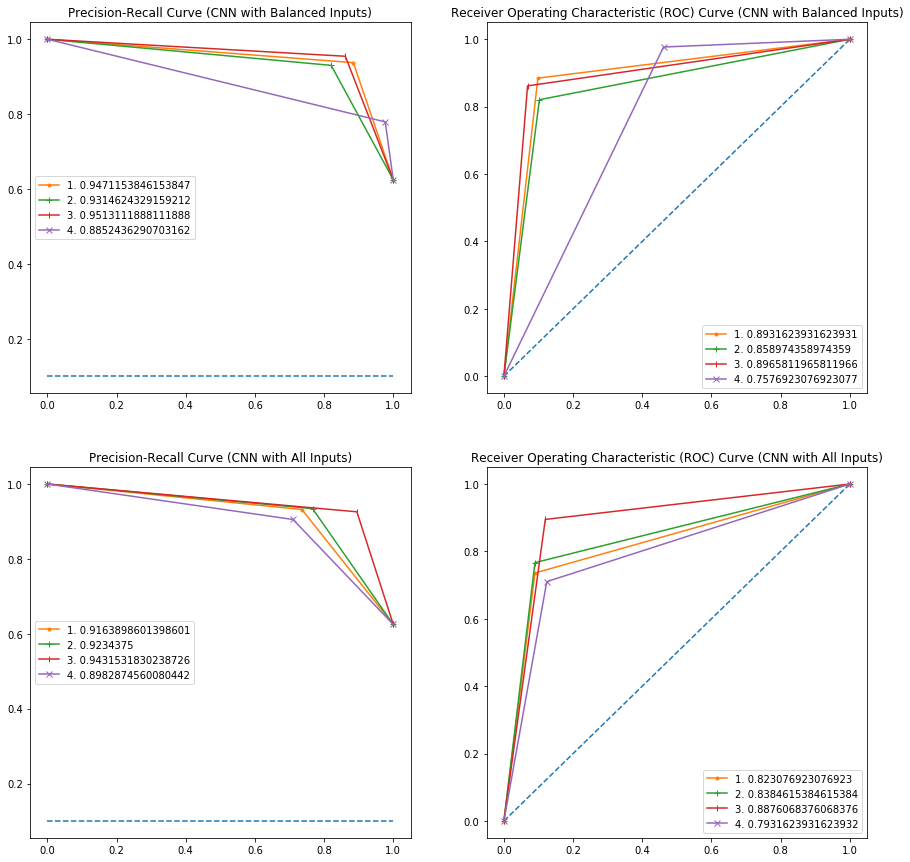

In [0]:
%matplotlib inline

fig_1 = plt.figure(figsize=(15,15))
gs_1 = gridspec.GridSpec(2, 2)


ax1 = plt.subplot(gs_1[0, 0])
# plot no skill
ax1 = plt.title('Precision-Recall Curve (CNN with Balanced Inputs)')
ax1 = plt.plot([0, 1], [0.1, 0.1], linestyle='--')
# plot the precision-recall curve for the model
ax1 = plt.plot(report_bal_1['PRC_recall'], report_bal_1['PRC_precision'], marker='.', label='1. '+str(report_bal_1['AUC']))
ax1 = plt.plot(report_bal_2['PRC_recall'], report_bal_2['PRC_precision'], marker='+', label='2. '+str(report_bal_2['AUC']))
ax1 = plt.plot(report_bal_3['PRC_recall'], report_bal_3['PRC_precision'], marker='|', label='3. '+str(report_bal_3['AUC']))
ax1 = plt.plot(report_bal_4['PRC_recall'], report_bal_4['PRC_precision'], marker='x', label='4. '+str(report_bal_4['AUC']))
plt.legend()
# show the plot


ax2 = plt.subplot(gs_1[0, 1])
ax2 = plt.title('Receiver Operating Characteristic (ROC) Curve (CNN with Balanced Inputs)')
# plot no skill
ax2 = plt.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
ax2 = plt.plot(report_bal_1['fpr'], report_bal_1['tpr'], marker='.', label='1. '+str(report_bal_1['ROC_AUC']))
ax2 = plt.plot(report_bal_2['fpr'], report_bal_2['tpr'], marker='+', label='2. '+str(report_bal_2['ROC_AUC']))
ax2 = plt.plot(report_bal_3['fpr'], report_bal_3['tpr'], marker='|', label='3. '+str(report_bal_3['ROC_AUC']))
ax2 = plt.plot(report_bal_4['fpr'], report_bal_4['tpr'], marker='x', label='4. '+str(report_bal_4['ROC_AUC']))
plt.legend()
# show the plot

ax3 = plt.subplot(gs_1[1, 0])
# plot no skill
ax3 = plt.title('Precision-Recall Curve (CNN with All Inputs)')
ax3 = plt.plot([0, 1], [0.1, 0.1], linestyle='--')
# plot the precision-recall curve for the model
ax3 = plt.plot(report_unbal_1['PRC_recall'], report_unbal_1['PRC_precision'], marker='.', label='1. '+str(report_unbal_1['AUC']))
ax3 = plt.plot(report_unbal_2['PRC_recall'], report_unbal_2['PRC_precision'], marker='+', label='2. '+str(report_unbal_2['AUC']))
ax3 = plt.plot(report_unbal_3['PRC_recall'], report_unbal_3['PRC_precision'], marker='|', label='3. '+str(report_unbal_3['AUC']))
ax3 = plt.plot(report_unbal_4['PRC_recall'], report_unbal_4['PRC_precision'], marker='x', label='4. '+str(report_unbal_4['AUC']))
plt.legend()
# show the plot


ax4 = plt.subplot(gs_1[1, 1])
ax4 = plt.title('Receiver Operating Characteristic (ROC) Curve (CNN with All Inputs)')
# plot no skill
ax4 = plt.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
ax4 = plt.plot(report_unbal_1['fpr'], report_unbal_1['tpr'], marker='.', label='1. '+str(report_unbal_1['ROC_AUC']))
ax4 = plt.plot(report_unbal_2['fpr'], report_unbal_2['tpr'], marker='+', label='2. '+str(report_unbal_2['ROC_AUC']))
ax4 = plt.plot(report_unbal_3['fpr'], report_unbal_3['tpr'], marker='|', label='3. '+str(report_unbal_3['ROC_AUC']))
ax4 = plt.plot(report_unbal_4['fpr'], report_unbal_4['tpr'], marker='x', label='4. '+str(report_unbal_4['ROC_AUC']))
plt.legend()
# show the plot


plt.show()

In [0]:
report_metrics(cnn_model1,test_tensors,test_targets)['PRC_precision']

array([0.625     , 0.76808511, 1.        ])

Transfer Learning using different pre-trained models (Inceptionv3)

In [0]:
#Load the Inception_V3 model
inception_base_model = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape = (256, 256, 3))
 
# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in inception_base_model.layers:
    layer.trainable = False

#Adding custom Layers 
x = inception_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
inception_predictions = Dense(2, activation="softmax")(x)


# creating the final model 
inception_model = Model(inputs = inception_base_model.input, outputs = inception_predictions)



87916544/87910968 [==============================] - 3s 0us/step


Transfer Learning using different pre-trained models (Xception)

In [0]:
#Load the Xception model
Xception_base_model = xception.Xception(weights='imagenet', include_top=False, input_shape = (256, 256, 3))
 
# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in Xception_base_model.layers:
    layer.trainable = False

#Adding custom Layers 
x = Xception_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
Xception_predictions = Dense(2, activation="softmax")(x)


# creating the final model 
Xception_model = Model(inputs = Xception_base_model.input, outputs = Xception_predictions)




83689472/83683744 [==============================] - 12s 0us/step


In [0]:
batch_size = 64
epochs = 50
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=15, mode='min')

# Compile Inception based Transfer Model
inception_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


checkpoint_inception_balanced = ModelCheckpoint(filepath='saved_models/inception_transfer_balanced.hdf5', \
                                              monitor='val_loss', mode='min', verbose=1, save_best_only=True)

csv_logger_inception_balanced = CSVLogger('saved_models/training_inception_balanced.log', separator=',', append=False)

train_inception_balanced = inception_model.fit_generator(datagen.flow(train_tensors_rebalanced, train_targets_rebalanced_OHE,batch_size=batch_size),\
                               steps_per_epoch=len(train_tensors_rebalanced)/batch_size, epochs=epochs,\
                               validation_data=(valid_tensors, valid_targets), verbose=1, \
                               callbacks=[early_stopping_monitor, checkpoint_inception_balanced, csv_logger_inception_balanced])


checkpoint_inception_unbalanced = ModelCheckpoint(filepath='saved_models/inception_transfer_unbalanced.hdf5', \
                                              monitor='val_loss', mode='min', verbose=1, save_best_only=True)

csv_logger_inception_unbalanced = CSVLogger('saved_models/training_inception_unbalanced.log', separator=',', append=False)

train_inception_unbalanced = inception_model.fit_generator(datagen.flow(train_tensors, train_targets,batch_size=batch_size),\
                               steps_per_epoch=len(train_tensors)/batch_size, epochs=epochs,\
                               validation_data=(valid_tensors, valid_targets), verbose=1, \
                               callbacks=[early_stopping_monitor, checkpoint_inception_unbalanced, csv_logger_inception_unbalanced])


#Compile Xception based Transfer Model
Xception_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


checkpoint_Xception_balanced = ModelCheckpoint(filepath='saved_models/Xception_transfer_balanced.hdf5', \
                                              monitor='val_loss', mode='min', verbose=1, save_best_only=True)

csv_logger_Xception_balanced = CSVLogger('saved_models/training_Xception_balanced.log', separator=',', append=False)

train_Xception_balanced = Xception_model.fit_generator(datagen.flow(train_tensors_rebalanced, train_targets_rebalanced_OHE,batch_size=batch_size),\
                               steps_per_epoch=len(train_tensors_rebalanced)/batch_size, epochs=epochs,\
                               validation_data=(valid_tensors, valid_targets), verbose=1, \
                               callbacks=[early_stopping_monitor, checkpoint_Xception_balanced, csv_logger_Xception_balanced])


checkpoint_Xception_unbalanced = ModelCheckpoint(filepath='saved_models/Xception_transfer_unbalanced.hdf5', \
                                              monitor='val_loss', mode='min', verbose=1, save_best_only=True)

csv_logger_Xception_unbalanced = CSVLogger('saved_models/training_Xception_unbalanced.log', separator=',', append=False)

train_Xception_unbalanced = Xception_model.fit_generator(datagen.flow(train_tensors, train_targets,batch_size=batch_size),\
                               steps_per_epoch=len(train_tensors)/batch_size, epochs=epochs,\
                               validation_data=(valid_tensors, valid_targets), verbose=1, \
                               callbacks=[early_stopping_monitor, checkpoint_Xception_unbalanced, csv_logger_Xception_unbalanced])




Epoch 1/50
42/41 [==============================] - 40s 946ms/step - loss: 0.6367 - acc: 0.6615 - val_loss: 0.7066 - val_acc: 0.5625

Epoch 00001: val_loss improved from inf to 0.70656, saving model to saved_models/inception_transfer_balanced.hdf5
Epoch 2/50
42/41 [==============================] - 25s 586ms/step - loss: 0.4429 - acc: 0.8063 - val_loss: 1.1070 - val_acc: 0.5000

Epoch 00002: val_loss did not improve from 0.70656
Epoch 3/50
42/41 [==============================] - 33s 790ms/step - loss: 0.3838 - acc: 0.8421 - val_loss: 0.7284 - val_acc: 0.5000

Epoch 00003: val_loss did not improve from 0.70656
Epoch 4/50
42/41 [==============================] - 33s 786ms/step - loss: 0.3597 - acc: 0.8499 - val_loss: 0.6493 - val_acc: 0.5625

Epoch 00004: val_loss improved from 0.70656 to 0.64932, saving model to saved_models/inception_transfer_balanced.hdf5
Epoch 5/50
42/41 [==============================] - 32s 756ms/step - loss: 0.3354 - acc: 0.8591 - val_loss: 0.6606 - val_acc: 0.68

In [0]:
inception_model.load_weights('saved_models/inception_transfer_balanced.hdf5')
report_inception_balanced = report_metrics(inception_model,test_tensors,test_targets)

print('Balanced Training Data-Inception (dropout 0.2): \n {}'.format(report_inception_balanced))

inception_model.load_weights('saved_models/inception_transfer_unbalanced.hdf5')
report_inception_unbalanced = report_metrics(inception_model,test_tensors,test_targets)

print('Unbalanced Training Data-Inception (dropout 0.2): \n {}'.format(report_inception_unbalanced))


Xception_model.load_weights('saved_models/Xception_transfer_balanced.hdf5')
report_Xception_balanced = report_metrics(Xception_model,test_tensors,test_targets)

print('Balanced Training Data-Xception (dropout 0.2): \n {}'.format(report_Xception_balanced))

Xception_model.load_weights('saved_models/Xception_transfer_unbalanced.hdf5')
report_Xception_unbalanced = report_metrics(inception_model,test_tensors,test_targets)

print('Unbalanced Training Data-Xception (dropout 0.2): \n {}'.format(report_Xception_unbalanced))


Balanced Training Data-Inception (dropout 0.2): 
 {'accuracy': 71.47435897435898, 'confusion_matrix': array([[171,  63],
       [115, 275]]), 'kappa_score': 0.41734860883797054, 'precision': 0.8136094674556213, 'recall': 0.7051282051282052, 'f1': 0.7554945054945056, 'fbeta_2': 0.7244467860906217, 'PRC_precision': array([0.625     , 0.81360947, 1.        ]), 'PRC_recall': array([1.        , 0.70512821, 0.        ]), 'PRC_thresholds': array([0, 1]), 'AUC': 0.8515162721893491, 'fpr': array([0.        , 0.26923077, 1.        ]), 'tpr': array([0.        , 0.70512821, 1.        ]), 'ROC_thresholds': array([2, 1, 0]), 'ROC_AUC': 0.7179487179487181}
Unbalanced Training Data-Inception (dropout 0.2): 
 {'accuracy': 71.7948717948718, 'confusion_matrix': array([[158,  76],
       [100, 290]]), 'kappa_score': 0.41038525963149075, 'precision': 0.7923497267759563, 'recall': 0.7435897435897436, 'f1': 0.7671957671957672, 'fbeta_2': 0.7528556593977155, 'PRC_precision': array([0.625     , 0.79234973, 1. 

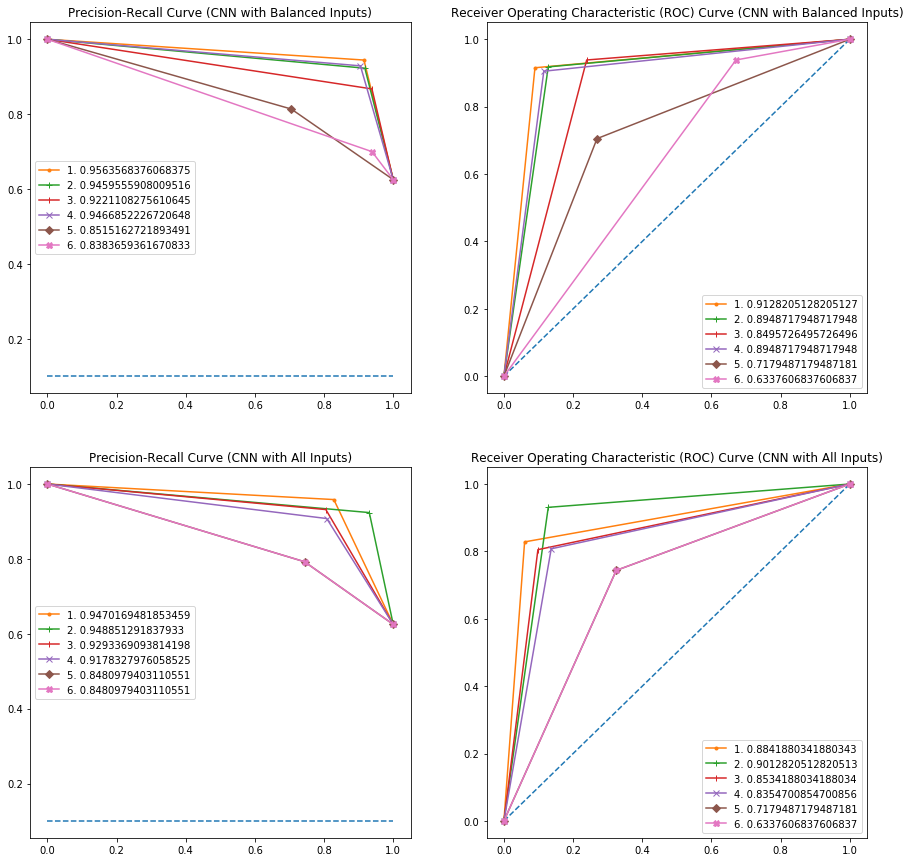

In [0]:
%matplotlib inline

fig_2 = plt.figure(figsize=(15,15))
gs_1 = gridspec.GridSpec(2, 2)


ax1 = plt.subplot(gs_1[0, 0])
# plot no skill
ax1 = plt.title('Precision-Recall Curve (CNN with Balanced Inputs)')
ax1 = plt.plot([0, 1], [0.1, 0.1], linestyle='--')
# plot the precision-recall curve for the model
ax1 = plt.plot(report_bal_1['PRC_recall'], report_bal_1['PRC_precision'], marker='.', label='1. '+str(report_bal_1['AUC']))
ax1 = plt.plot(report_bal_2['PRC_recall'], report_bal_2['PRC_precision'], marker='+', label='2. '+str(report_bal_2['AUC']))
ax1 = plt.plot(report_bal_3['PRC_recall'], report_bal_3['PRC_precision'], marker='|', label='3. '+str(report_bal_3['AUC']))
ax1 = plt.plot(report_bal_4['PRC_recall'], report_bal_4['PRC_precision'], marker='x', label='4. '+str(report_bal_4['AUC']))
ax1 = plt.plot(report_inception_balanced['PRC_recall'], report_inception_balanced['PRC_precision'], \
               marker='D', label='5. '+str(report_inception_balanced['AUC']))
ax1 = plt.plot(report_Xception_balanced['PRC_recall'], report_Xception_balanced['PRC_precision'], \
               marker='X', label='6. '+str(report_Xception_balanced['AUC']))
plt.legend()
# show the plot


ax2 = plt.subplot(gs_1[0, 1])
ax2 = plt.title('Receiver Operating Characteristic (ROC) Curve (CNN with Balanced Inputs)')
# plot no skill
ax2 = plt.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
ax2 = plt.plot(report_bal_1['fpr'], report_bal_1['tpr'], marker='.', label='1. '+str(report_bal_1['ROC_AUC']))
ax2 = plt.plot(report_bal_2['fpr'], report_bal_2['tpr'], marker='+', label='2. '+str(report_bal_2['ROC_AUC']))
ax2 = plt.plot(report_bal_3['fpr'], report_bal_3['tpr'], marker='|', label='3. '+str(report_bal_3['ROC_AUC']))
ax2 = plt.plot(report_bal_4['fpr'], report_bal_4['tpr'], marker='x', label='4. '+str(report_bal_4['ROC_AUC']))
ax2 = plt.plot(report_inception_balanced['fpr'], report_inception_balanced['tpr'], \
               marker='D', label='5. '+str(report_inception_balanced['ROC_AUC']))
ax2 = plt.plot(report_Xception_balanced['fpr'], report_Xception_balanced['tpr'], \
               marker='X', label='6. '+str(report_Xception_balanced['ROC_AUC']))
plt.legend()
# show the plot

ax3 = plt.subplot(gs_1[1, 0])
# plot no skill
ax3 = plt.title('Precision-Recall Curve (CNN with All Inputs)')
ax3 = plt.plot([0, 1], [0.1, 0.1], linestyle='--')
# plot the precision-recall curve for the model
ax3 = plt.plot(report_unbal_1['PRC_recall'], report_unbal_1['PRC_precision'], marker='.', label='1. '+str(report_unbal_1['AUC']))
ax3 = plt.plot(report_unbal_2['PRC_recall'], report_unbal_2['PRC_precision'], marker='+', label='2. '+str(report_unbal_2['AUC']))
ax3 = plt.plot(report_unbal_3['PRC_recall'], report_unbal_3['PRC_precision'], marker='|', label='3. '+str(report_unbal_3['AUC']))
ax3 = plt.plot(report_unbal_4['PRC_recall'], report_unbal_4['PRC_precision'], marker='x', label='4. '+str(report_unbal_4['AUC']))
ax3 = plt.plot(report_inception_unbalanced['PRC_recall'], report_inception_unbalanced['PRC_precision'], \
               marker='D', label='5. '+str(report_inception_unbalanced['AUC']))
ax3 = plt.plot(report_Xception_unbalanced['PRC_recall'], report_Xception_unbalanced['PRC_precision'], \
               marker='X', label='6. '+str(report_Xception_unbalanced['AUC']))

plt.legend()
# show the plot


ax4 = plt.subplot(gs_1[1, 1])
ax4 = plt.title('Receiver Operating Characteristic (ROC) Curve (CNN with All Inputs)')
# plot no skill
ax4 = plt.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
ax4 = plt.plot(report_unbal_1['fpr'], report_unbal_1['tpr'], marker='.', label='1. '+str(report_unbal_1['ROC_AUC']))
ax4 = plt.plot(report_unbal_2['fpr'], report_unbal_2['tpr'], marker='+', label='2. '+str(report_unbal_2['ROC_AUC']))
ax4 = plt.plot(report_unbal_3['fpr'], report_unbal_3['tpr'], marker='|', label='3. '+str(report_unbal_3['ROC_AUC']))
ax4 = plt.plot(report_unbal_4['fpr'], report_unbal_4['tpr'], marker='x', label='4. '+str(report_unbal_4['ROC_AUC']))
ax4 = plt.plot(report_inception_unbalanced['fpr'], report_inception_unbalanced['tpr'], \
               marker='D', label='5. '+str(report_inception_balanced['ROC_AUC']))
ax4 = plt.plot(report_Xception_unbalanced['fpr'], report_Xception_unbalanced['tpr'], \
               marker='X', label='6. '+str(report_Xception_balanced['ROC_AUC']))
plt.legend()
# show the plot


plt.show()

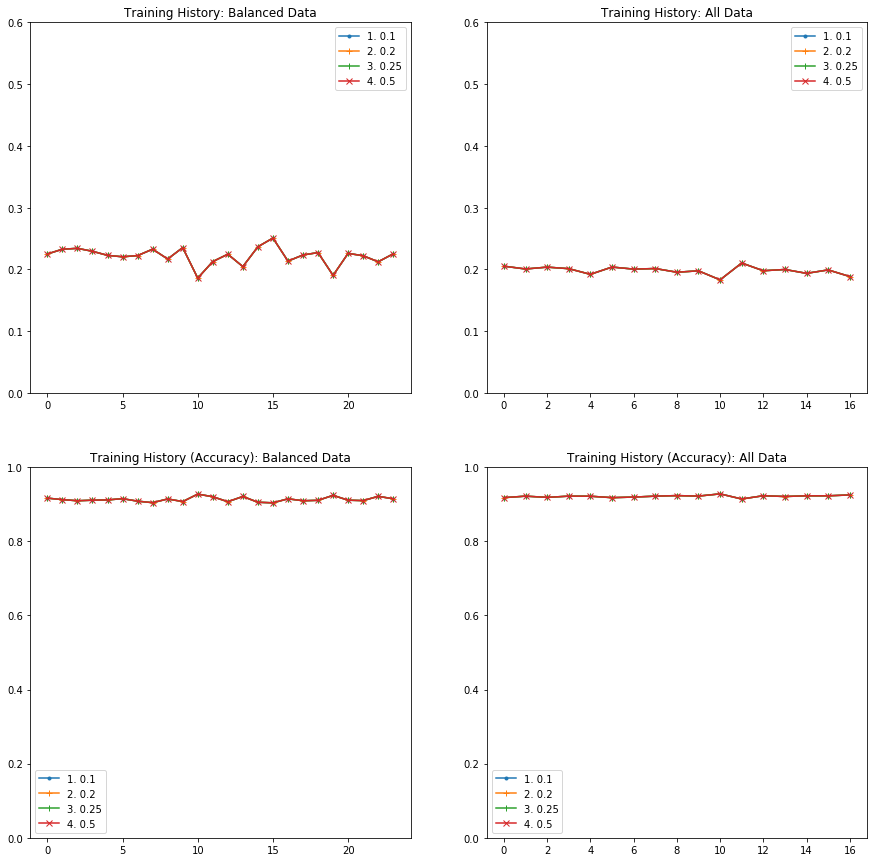

In [0]:
%matplotlib inline

fig_3 = plt.figure(figsize=(15,15))
gs_3 = gridspec.GridSpec(2, 2)


ax1 = plt.subplot(gs_3[0, 0])
ax1 = plt.title('Training History: Balanced Data')
ax1 = plt.plot(train_inception_balanced.history['loss'], marker='.', label='1. 0.1')
ax1 = plt.plot(train_inception_balanced.history['loss'], marker='+', label='2. 0.2')
ax1 = plt.plot(train_inception_balanced.history['loss'], marker='|', label='3. 0.25')
ax1 = plt.plot(train_inception_balanced.history['loss'], marker='x', label='4. 0.5')
ax1 = plt.ylim([0,0.6])
plt.legend()
# show the plot


ax2 = plt.subplot(gs_3[0, 1])
ax2 = plt.title('Training History: All Data')
ax2 = plt.plot(train_inception_unbalanced.history['loss'], marker='.', label='1. 0.1')
ax2 = plt.plot(train_inception_unbalanced.history['loss'], marker='+', label='2. 0.2')
ax2 = plt.plot(train_inception_unbalanced.history['loss'], marker='|', label='3. 0.25')
ax2 = plt.plot(train_inception_unbalanced.history['loss'], marker='x', label='4. 0.5')
ax2 = plt.ylim([0,0.6])
plt.legend()
# show the plot



ax3 = plt.subplot(gs_3[1, 0])
ax3 = plt.title('Training History (Accuracy): Balanced Data')
ax3 = plt.plot(train_inception_balanced.history['acc'], marker='.', label='1. 0.1')
ax3 = plt.plot(train_inception_balanced.history['acc'], marker='+', label='2. 0.2')
ax3 = plt.plot(train_inception_balanced.history['acc'], marker='|', label='3. 0.25')
ax3 = plt.plot(train_inception_balanced.history['acc'], marker='x', label='4. 0.5')
ax3 = plt.ylim([0,1])
plt.legend()
# show the plot


ax4 = plt.subplot(gs_3[1, 1])
ax4 = plt.title('Training History (Accuracy): All Data')
ax4 = plt.plot(train_inception_unbalanced.history['acc'], marker='.', label='1. 0.1')
ax4 = plt.plot(train_inception_unbalanced.history['acc'], marker='+', label='2. 0.2')
ax4 = plt.plot(train_inception_unbalanced.history['acc'], marker='|', label='3. 0.25')
ax4 = plt.plot(train_inception_unbalanced.history['acc'], marker='x', label='4. 0.5')
ax4 = plt.ylim([0,1])
plt.legend()
# show the plot
plt.show()

In [0]:
pwd

'/content/chest_xray'

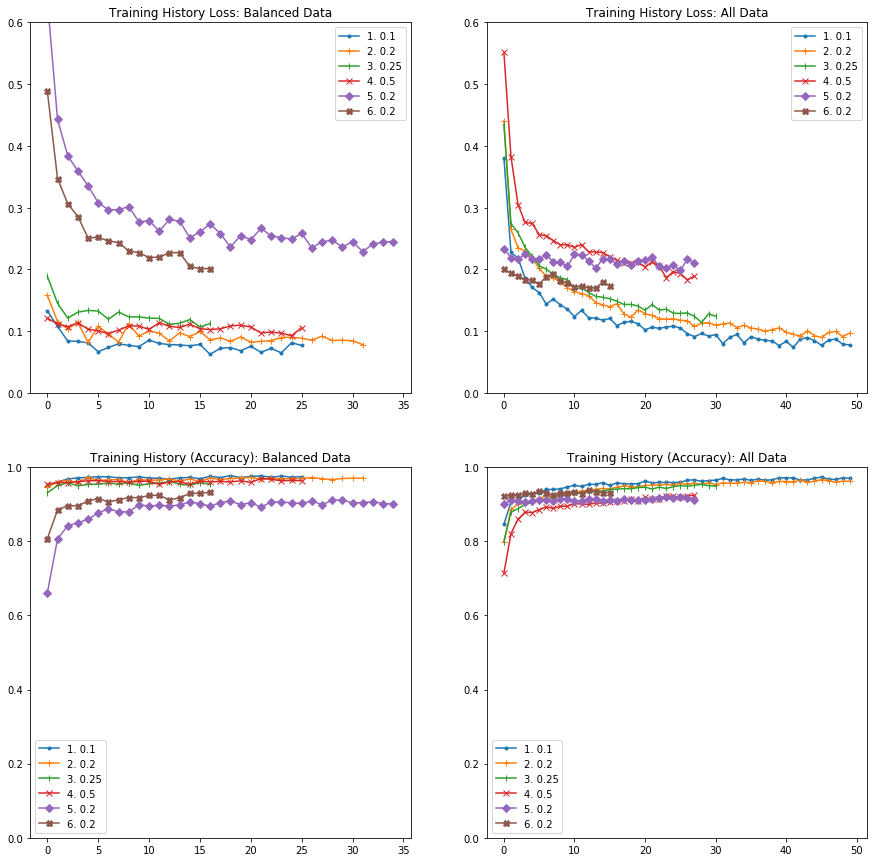

In [0]:
%matplotlib inline

fig_2 = plt.figure(figsize=(15,15))
gs_2 = gridspec.GridSpec(2, 2)


ax1 = plt.subplot(gs_2[0, 0])
ax1 = plt.title('Training History Loss: Balanced Data')
ax1 = plt.plot(train_bal_cnn1.history['loss'], marker='.', label='1. 0.1')
ax1 = plt.plot(train_bal_cnn2.history['loss'], marker='+', label='2. 0.2')
ax1 = plt.plot(train_bal_cnn3.history['loss'], marker='|', label='3. 0.25')
ax1 = plt.plot(train_bal_cnn4.history['loss'], marker='x', label='4. 0.5')
ax1 = plt.plot(train_inception_balanced.history['loss'], marker='D', label='5. 0.2')
ax1 = plt.plot(train_Xception_balanced.history['loss'], marker='X', label='6. 0.2')
ax1 = plt.ylim([0,0.6])
plt.legend()
# show the plot


ax2 = plt.subplot(gs_2[0, 1])
ax2 = plt.title('Training History Loss: All Data')
ax2 = plt.plot(train_unbal_cnn1.history['loss'], marker='.', label='1. 0.1')
ax2 = plt.plot(train_unbal_cnn2.history['loss'], marker='+', label='2. 0.2')
ax2 = plt.plot(train_unbal_cnn3.history['loss'], marker='|', label='3. 0.25')
ax2 = plt.plot(train_unbal_cnn4.history['loss'], marker='x', label='4. 0.5')
ax2 = plt.plot(train_inception_unbalanced.history['loss'], marker='D', label='5. 0.2')
ax2 = plt.plot(train_Xception_unbalanced.history['loss'], marker='X', label='6. 0.2')
ax2 = plt.ylim([0,0.6])
plt.legend()
# show the plot



ax3 = plt.subplot(gs_2[1, 0])
ax3 = plt.title('Training History (Accuracy): Balanced Data')
ax3 = plt.plot(train_bal_cnn1.history['acc'], marker='.', label='1. 0.1')
ax3 = plt.plot(train_bal_cnn2.history['acc'], marker='+', label='2. 0.2')
ax3 = plt.plot(train_bal_cnn3.history['acc'], marker='|', label='3. 0.25')
ax3 = plt.plot(train_bal_cnn4.history['acc'], marker='x', label='4. 0.5')
ax3 = plt.plot(train_inception_balanced.history['acc'], marker='D', label='5. 0.2')
ax3 = plt.plot(train_Xception_balanced.history['acc'], marker='X', label='6. 0.2')
ax3 = plt.ylim([0,1])
plt.legend()
# show the plot


ax4 = plt.subplot(gs_2[1, 1])
ax4 = plt.title('Training History (Accuracy): All Data')
ax4 = plt.plot(train_unbal_cnn1.history['acc'], marker='.', label='1. 0.1')
ax4 = plt.plot(train_unbal_cnn2.history['acc'], marker='+', label='2. 0.2')
ax4 = plt.plot(train_unbal_cnn3.history['acc'], marker='|', label='3. 0.25')
ax4 = plt.plot(train_unbal_cnn4.history['acc'], marker='x', label='4. 0.5')
ax4 = plt.plot(train_inception_unbalanced.history['acc'], marker='D', label='5. 0.2')
ax4 = plt.plot(train_Xception_unbalanced.history['acc'], marker='X', label='6. 0.2')
ax4 = plt.ylim([0,1])
plt.legend()
# show the plot
plt.show()

In [0]:
!ls -a

.  ..  saved_models  test  train  val


In [0]:
cd /content/chest_xray/saved_models

/content/chest_xray/saved_models


In [0]:
cd /content/gdrive/My Drive/Colab_stuff

/content/gdrive/My Drive/Colab_stuff


In [0]:
!ls -la

total 15656
drwxr-xr-x 2 root root    4096 May 22 15:27 .
drwxr-xr-x 6 root root    4096 May 22 13:01 ..
-rw-r--r-- 1 root root 1999688 May 22 14:58 best_cnn1_bal.hdf5
-rw-r--r-- 1 root root 1999688 May 22 13:36 best_cnn1_unbal.hdf5
-rw-r--r-- 1 root root 2000056 May 22 15:08 best_cnn2_bal.hdf5
-rw-r--r-- 1 root root 2000056 May 22 13:55 best_cnn2_unbal.hdf5
-rw-r--r-- 1 root root 1999696 May 22 15:22 best_cnn3_bal.hdf5
-rw-r--r-- 1 root root 1999696 May 22 14:15 best_cnn3_unbal.hdf5
-rw-r--r-- 1 root root 1999696 May 22 15:32 best_cnn4_bal.hdf5
-rw-r--r-- 1 root root 1999696 May 22 14:46 best_cnn4_unbal.hdf5


In [0]:
!cp -v /content/chest_xray/saved_models/* '/content/gdrive/My Drive/Colab_stuff/saved_models/'

'/content/chest_xray/saved_models/benchmark.hdf5' -> '/content/gdrive/My Drive/Colab_stuff/saved_models/benchmark.hdf5'
'/content/chest_xray/saved_models/best_cnn1_bal.hdf5' -> '/content/gdrive/My Drive/Colab_stuff/saved_models/best_cnn1_bal.hdf5'
'/content/chest_xray/saved_models/best_cnn1_unbal.hdf5' -> '/content/gdrive/My Drive/Colab_stuff/saved_models/best_cnn1_unbal.hdf5'
'/content/chest_xray/saved_models/best_cnn2_bal.hdf5' -> '/content/gdrive/My Drive/Colab_stuff/saved_models/best_cnn2_bal.hdf5'
'/content/chest_xray/saved_models/best_cnn2_unbal.hdf5' -> '/content/gdrive/My Drive/Colab_stuff/saved_models/best_cnn2_unbal.hdf5'
'/content/chest_xray/saved_models/best_cnn3_bal.hdf5' -> '/content/gdrive/My Drive/Colab_stuff/saved_models/best_cnn3_bal.hdf5'
'/content/chest_xray/saved_models/best_cnn3_unbal.hdf5' -> '/content/gdrive/My Drive/Colab_stuff/saved_models/best_cnn3_unbal.hdf5'
'/content/chest_xray/saved_models/best_cnn4_bal.hdf5' -> '/content/gdrive/My Drive/Colab_stuff/saved

In [0]:
!mkdir saved_models

In [0]:
cd /content/chest_xray

/content/chest_xray


In [0]:
!ls -la

total 24
drwxr-xr-x 6 root root 4096 May 22 23:02 .
drwxr-xr-x 1 root root 4096 May 22 23:06 ..
drwxr-xr-x 2 root root 4096 May 23 05:14 saved_models
drwxr-xr-x 4 root root 4096 May 22 22:55 test
drwxr-xr-x 4 root root 4096 May 22 22:55 train
drwxr-xr-x 4 root root 4096 May 22 22:55 val


In [0]:



df_bal_cnn1 = pd.read_csv('saved_models/training_balanced_1.log', sep=',')
df_bal_cnn2 = pd.read_csv('saved_models/training_balanced_2.log', sep=',')
df_bal_cnn3 = pd.read_csv('saved_models/training_balanced_3.log', sep=',')
df_bal_cnn4 = pd.read_csv('saved_models/training_balanced_4.log', sep=',')
df_inception_balanced = pd.read_csv('saved_models/training_inception_balanced.log', sep=',')
df_Xception_balanced = pd.read_csv('saved_models/training_Xception_balanced.log', sep=',')

df_unbal_cnn1 = pd.read_csv('saved_models/training_unbalanced_1.log', sep=',')
df_unbal_cnn2 = pd.read_csv('saved_models/training_unbalanced_2.log', sep=',')
df_unbal_cnn3 = pd.read_csv('saved_models/training_unbalanced_3.log', sep=',')
df_unbal_cnn4 = pd.read_csv('saved_models/training_unbalanced_4.log', sep=',')
df_inception_unbalanced = pd.read_csv('saved_models/training_inception_unbalanced.log', sep=',')
df_Xception_unbalanced = pd.read_csv('saved_models/training_Xception_unbalanced.log', sep=',')

In [0]:
df_inception_unbalanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
epoch       17 non-null int64
acc         17 non-null float64
loss        17 non-null float64
val_acc     17 non-null float64
val_loss    17 non-null float64
dtypes: float64(4), int64(1)
memory usage: 760.0 bytes


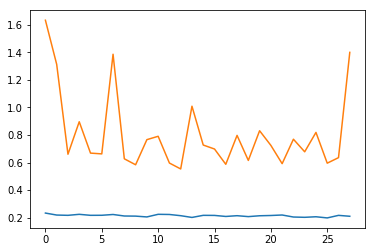

In [0]:
plt.plot(df_inception_unbalanced['epoch'], df_inception_unbalanced['loss'])
plt.plot(df_inception_unbalanced['epoch'], df_inception_unbalanced['val_loss'])
plt.show()

In [0]:
list_of_reports = [report_bal_1,report_bal_2,report_bal_3,report_bal_4,\
 report_inception_balanced,report_Xception_balanced,\
 report_unbal_1,report_unbal_2,report_unbal_3,report_unbal_4,\
 report_inception_unbalanced,report_Xception_unbalanced]

In [0]:
df_reports = pd.DataFrame(list_of_reports,  \
                          index=['CNN_Balanced_Dropout_0.1', 'CNN_Balanced_Dropout_0.2', 'CNN_Balanced_Dropout_0.25',\
                                 'CNN_Balanced_Dropout_0.5','Transfer_Inception_Balanced_Dropout_0.2', 'Transfer_Xception_Balanced_Dropout_0.2', \
                                 'CNN_Unbalanced_Dropout_0.1', 'CNN_Unbalanced_Dropout_0.2', 'CNN_Unbalanced_Dropout_0.25',\
                                 'CNN_Unbalanced_Dropout_0.5','Transfer_Inception_Unbalanced_Dropout_0.2', 'Transfer_Xception_Unbalanced_Dropout_0.2'\
                                ])

In [0]:
df_reports.reindex()

,AUC,PRC_precision,PRC_recall,PRC_thresholds,ROC_AUC,ROC_thresholds,accuracy,confusion_matrix,f1,fbeta_2,fpr,kappa_score,precision,recall,tpr
CNN_Balanced_Dropout_0.1,0.956357,"[0.625, 0.9444444444444444, 1.0]","[1.0, 0.9153846153846154, 0.0]","[0, 1]",0.912821,"[2, 1, 0]",91.346154,"[[213, 21], [33, 357]]",0.929687,0.921053,"[0.0, 0.08974358974358974, 1.0]",0.817259,0.944444,0.915385,"[0.0, 0.9153846153846154, 1.0]"
CNN_Balanced_Dropout_0.2,0.945956,"[0.625, 0.9226804123711341, 1.0]","[1.0, 0.9179487179487179, 0.0]","[0, 1]",0.894872,"[2, 1, 0]",90.064103,"[[204, 30], [32, 358]]",0.920308,0.918891,"[0.0, 0.1282051282051282, 1.0]",0.788396,0.922680,0.917949,"[0.0, 0.9179487179487179, 1.0]"
CNN_Balanced_Dropout_0.25,0.922111,"[0.625, 0.8672985781990521, 1.0]","[1.0, 0.9384615384615385, 0.0]","[0, 1]",0.849573,"[2, 1, 0]",87.179487,"[[178, 56], [24, 366]]",0.901478,0.923310,"[0.0, 0.23931623931623933, 1.0]",0.718805,0.867299,0.938462,"[0.0, 0.9384615384615385, 1.0]"
CNN_Balanced_Dropout_0.5,0.946685,"[0.625, 0.9289473684210526, 1.0]","[1.0, 0.9051282051282051, 0.0]","[0, 1]",0.894872,"[2, 1, 0]",89.743590,"[[207, 27], [37, 353]]",0.916883,0.909794,"[0.0, 0.11538461538461539, 1.0]",0.783051,0.928947,0.905128,"[0.0, 0.9051282051282051, 1.0]"
Transfer_Inception_Balanced_Dropout_0.2,0.851516,"[0.625, 0.8136094674556213, 1.0]","[1.0, 0.7051282051282052, 0.0]","[0, 1]",0.717949,"[2, 1, 0]",71.474359,"[[171, 63], [115, 275]]",0.755495,0.724447,"[0.0, 0.2692307692307692, 1.0]",0.417349,0.813609,0.705128,"[0.0, 0.7051282051282052, 1.0]"
Transfer_Xception_Balanced_Dropout_0.2,0.838366,"[0.625, 0.6998087954110899, 1.0]","[1.0, 0.9384615384615385, 0.0]","[0, 1]",0.633761,"[2, 1, 0]",70.993590,"[[77, 157], [24, 366]]",0.801752,0.878541,"[0.0, 0.6709401709401709, 1.0]",0.301832,0.699809,0.938462,"[0.0, 0.9384615384615385, 1.0]"
CNN_Unbalanced_Dropout_0.1,0.947017,"[0.625, 0.9584569732937686, 1.0]","[1.0, 0.8282051282051283, 0.0]","[0, 1]",0.884188,"[2, 1, 0]",87.019231,"[[220, 14], [67, 323]]",0.888583,0.851344,"[0.0, 0.05982905982905983, 1.0]",0.735078,0.958457,0.828205,"[0.0, 0.8282051282051283, 1.0]"
CNN_Unbalanced_Dropout_0.2,0.948851,"[0.625, 0.9236641221374046, 1.0]","[1.0, 0.9307692307692308, 0.0]","[0, 1]",0.901282,"[2, 1, 0]",90.865385,"[[204, 30], [27, 363]]",0.927203,0.929339,"[0.0, 0.1282051282051282, 1.0]",0.804627,0.923664,0.930769,"[0.0, 0.9307692307692308, 1.0]"
CNN_Unbalanced_Dropout_0.25,0.929337,"[0.625, 0.9317507418397626, 1.0]","[1.0, 0.8051282051282052, 0.0]","[0, 1]",0.853419,"[2, 1, 0]",84.134615,"[[211, 23], [76, 314]]",0.863824,0.827623,"[0.0, 0.09829059829059829, 1.0]",0.676206,0.931751,0.805128,"[0.0, 0.8051282051282052, 1.0]"
CNN_Unbalanced_Dropout_0.5,0.917833,"[0.625, 0.9077809798270894, 1.0]","[1.0, 0.8076923076923077, 0.0]","[0, 1]",0.835470,"[2, 1, 0]",82.852564,"[[202, 32], [75, 315]]",0.854817,0.825905,"[0.0, 0.13675213675213677, 1.0]",0.647156,0.907781,0.807692,"[0.0, 0.8076923076923077, 1.0]"


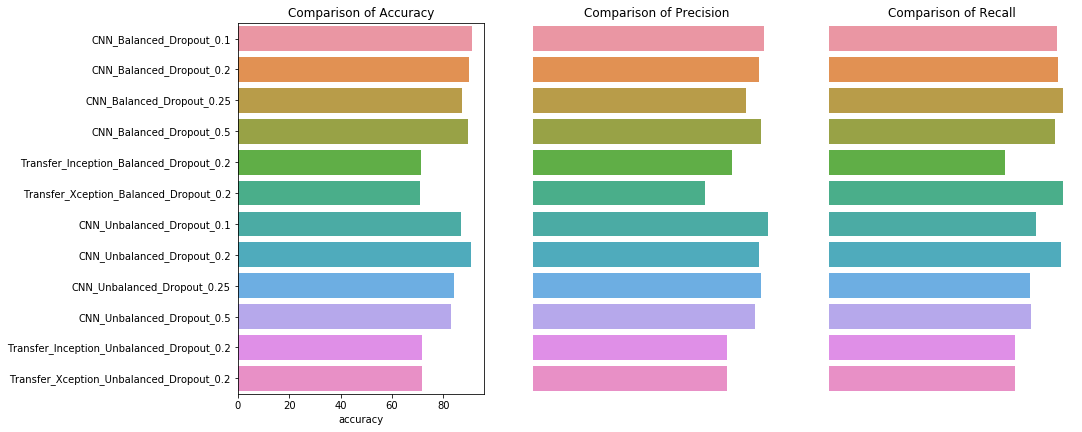

In [0]:
fig_y = plt.figure(figsize=(15,15))
gs_y = gridspec.GridSpec(2, 3)


ax1 = plt.subplot(gs_y[0, 0])
ax1 = plt.title('Comparison of Accuracy')
ax1 = sns.barplot(data=df_reports, y=df_reports.index,x='accuracy',)

ax2 = plt.subplot(gs_y[0, 1])
ax2 = plt.title('Comparison of Precision')
ax2 = sns.barplot(data=df_reports, y=df_reports.index,x='precision')
ax2.set_axis_off()


ax3 = plt.subplot(gs_y[0, 2])
ax3 = plt.title('Comparison of Recall')
ax3 = sns.barplot(data=df_reports, y=df_reports.index,x='recall')
ax3.set_axis_off()

In [0]:
df_reports.sort_values(by=['kappa_score'], ascending=False)['recall']

CNN_Balanced_Dropout_0.1                     0.915385
CNN_Unbalanced_Dropout_0.2                   0.930769
CNN_Balanced_Dropout_0.2                     0.917949
CNN_Balanced_Dropout_0.5                     0.905128
CNN_Unbalanced_Dropout_0.1                   0.828205
CNN_Balanced_Dropout_0.25                    0.938462
CNN_Unbalanced_Dropout_0.25                  0.805128
CNN_Unbalanced_Dropout_0.5                   0.807692
Transfer_Inception_Balanced_Dropout_0.2      0.705128
Transfer_Inception_Unbalanced_Dropout_0.2    0.743590
Transfer_Xception_Unbalanced_Dropout_0.2     0.743590
Transfer_Xception_Balanced_Dropout_0.2       0.938462
Name: recall, dtype: float64

In [0]:
df_reports[['AUC','recall','precision', 'kappa_score','accuracy']]

,AUC,recall,precision,kappa_score,accuracy
CNN_Balanced_Dropout_0.1,0.956357,0.915385,0.944444,0.817259,91.346154
CNN_Balanced_Dropout_0.2,0.945956,0.917949,0.922680,0.788396,90.064103
CNN_Balanced_Dropout_0.25,0.922111,0.938462,0.867299,0.718805,87.179487
CNN_Balanced_Dropout_0.5,0.946685,0.905128,0.928947,0.783051,89.743590
Transfer_Inception_Balanced_Dropout_0.2,0.851516,0.705128,0.813609,0.417349,71.474359
Transfer_Xception_Balanced_Dropout_0.2,0.838366,0.938462,0.699809,0.301832,70.993590
CNN_Unbalanced_Dropout_0.1,0.947017,0.828205,0.958457,0.735078,87.019231
CNN_Unbalanced_Dropout_0.2,0.948851,0.930769,0.923664,0.804627,90.865385
CNN_Unbalanced_Dropout_0.25,0.929337,0.805128,0.931751,0.676206,84.134615
CNN_Unbalanced_Dropout_0.5,0.917833,0.807692,0.907781,0.647156,82.852564


# New Section

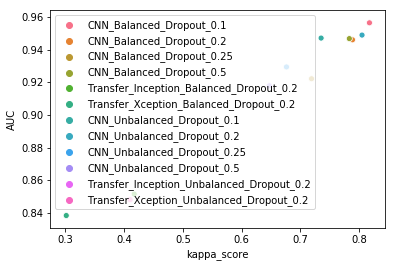

In [0]:
sns.scatterplot(data=df_reports,x='kappa_score',y='AUC',hue=df_reports.index)